In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Import libraries

In [2]:
import yfinance as yf


# Define the stock symbols
stock_symbols = ['AAPL', 'MSFT']

# Create dictionaries to store stock data
stock_data = {}

# Define the date range
start_date = '2018-10-01'
end_date = '2023-10-01'

# Fetch data for each stock symbol
for symbol in stock_symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Display sample data for Apple (AAPL)
for stock_symbol in stock_symbols:
  print(f"{stock_symbol}")
  print(stock_data[f'{stock_symbol}'].head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
AAPL
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-10-01  56.987499  57.355000  56.587502  56.814999  54.413631   94403200
2018-10-02  56.812500  57.500000  56.657501  57.320000  54.897301   99152800
2018-10-03  57.512501  58.367500  57.445000  58.017502  55.565315  114619200
2018-10-04  57.695000  58.087502  56.682499  56.997501  54.588432  128168000
2018-10-05  56.990002  57.102501  55.145000  56.072498  53.702522  134322000
MSFT
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-01  114.750000  115.680000  114.730003  115.610001  109.532539   
2018-10-02  115.300003  115.839996  114.440002  115.150002  109.096756   
2018-10-03  115.4

#EDAV

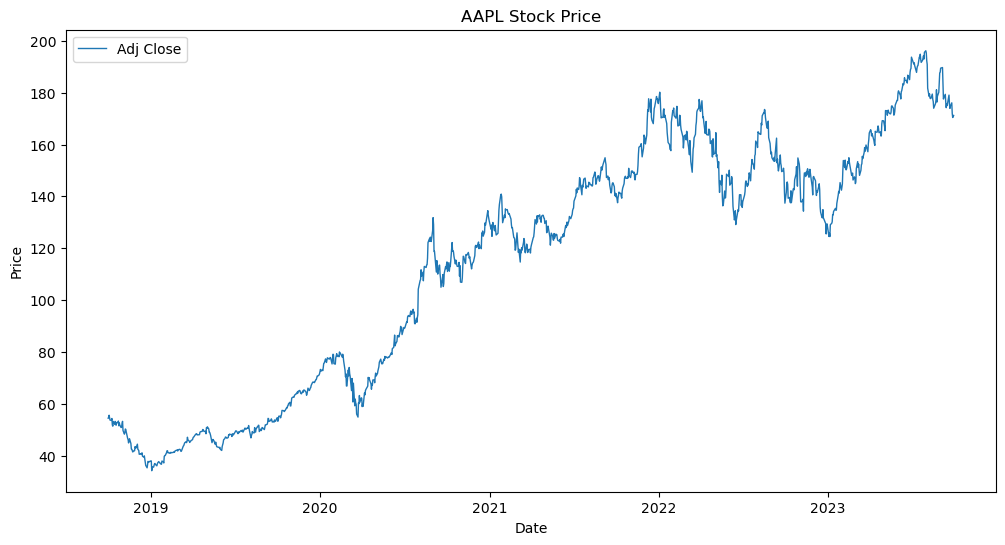

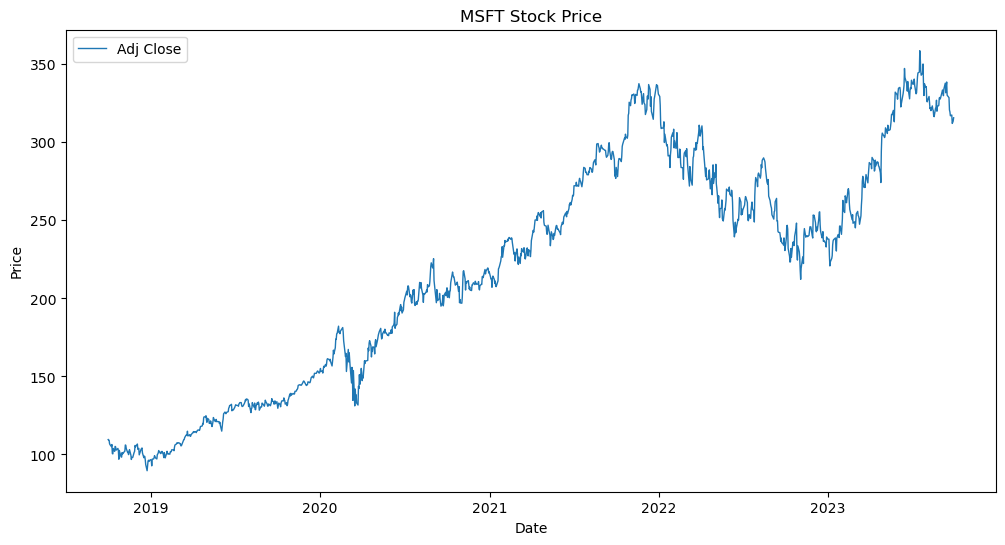

In [3]:
import matplotlib.pyplot as plt

# EDAV for each stock symbol
for symbol in stock_symbols:
    data = stock_data[symbol]

    # Plot the adjusted closing price
    plt.figure(figsize=(12, 6))
    plt.title(f'{symbol} Stock Price')
    plt.plot(data.index, data['Adj Close'], label='Adj Close', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


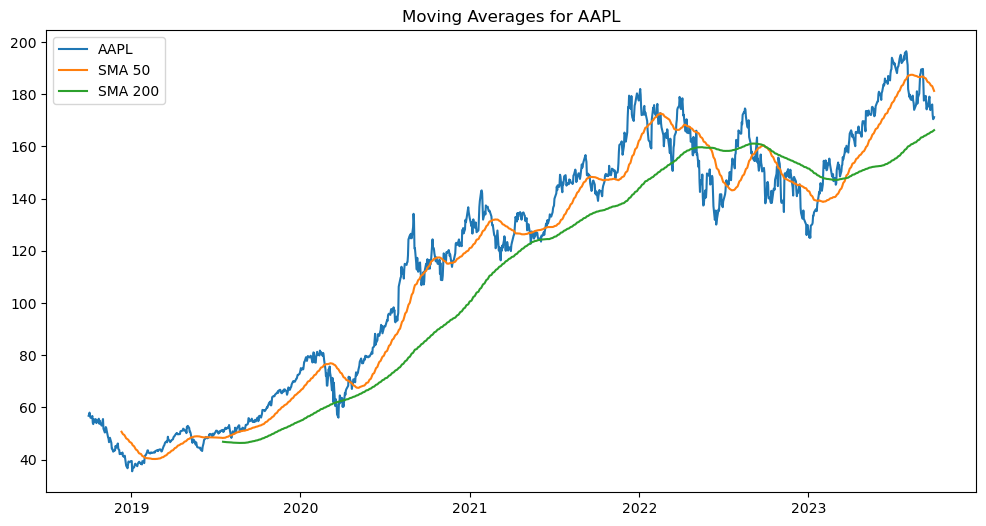

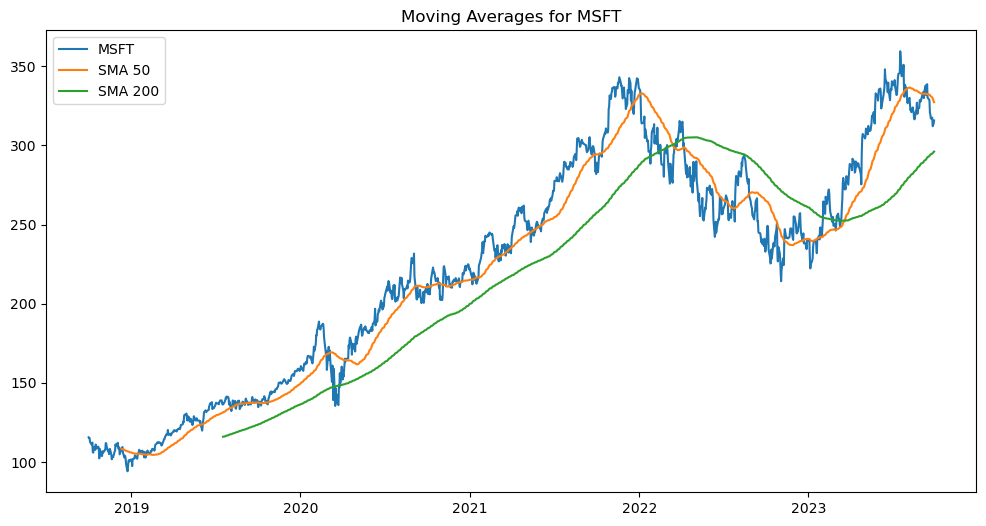

In [4]:
# Calculate and plot moving averages for each stock
for symbol in stock_symbols:
    stock_data[symbol]['SMA_50'] = stock_data[symbol]['Close'].rolling(window=50).mean()
    stock_data[symbol]['SMA_200'] = stock_data[symbol]['Close'].rolling(window=200).mean()

    # Plot moving averages for each stock
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data[symbol]['Close'], label=f'{symbol}')
    plt.plot(stock_data[symbol]['SMA_50'], label='SMA 50')
    plt.plot(stock_data[symbol]['SMA_200'], label='SMA 200')
    plt.title(f'Moving Averages for {symbol}')
    plt.legend()
    plt.show()


#Time Series Prediction

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [6]:
# Split the data into training and testing sets
split_date = '2023-01-01'
train_data = data[data.index < split_date]['Adj Close']
test_data = data[data.index >= split_date]['Adj Close']
# Create an empty dictionary to store results
results = {}


##Exponential Smoothing

/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


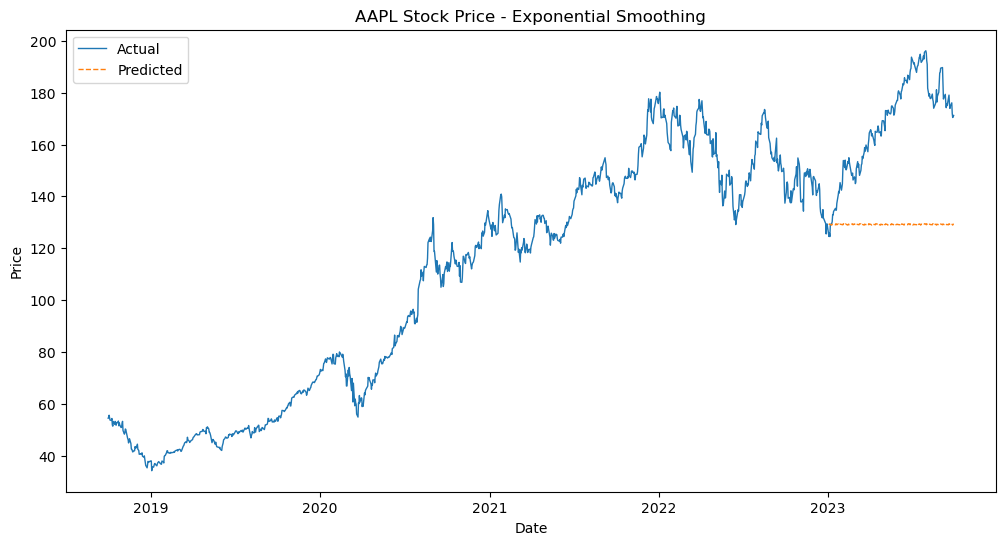

/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


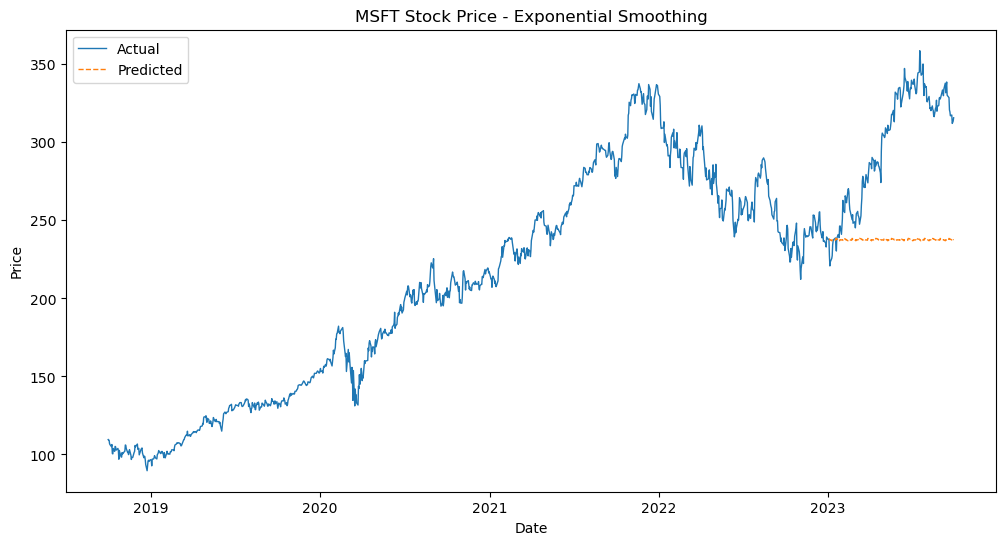

                                    MSE       RMSE  R-squared
AAPL_Exponential_Smoothing  1831.040344  42.790657  -4.875707
MSFT_Exponential_Smoothing  5071.624105  71.215336  -2.842857


In [7]:
# Create an empty dictionary to store results and plots
results_exponential_smoothing = {}
plots_exponential_smoothing = {}

# Loop through stock symbols
for symbol in stock_symbols:
    data = stock_data[symbol]

    # Split the data into training and testing sets
    split_date = '2023-01-01'
    train_data = data['Adj Close'][data.index < split_date]
    test_data = data['Adj Close'][data.index >= split_date]

    # Exponential Smoothing
    model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data, predictions)

    results_exponential_smoothing[f'{symbol}_Exponential_Smoothing'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

    # Create a plot for Exponential Smoothing
    plt.figure(figsize=(12, 6))
    plt.title(f'{symbol} Stock Price - Exponential Smoothing')
    plt.plot(data.index, data['Adj Close'], label='Actual', linewidth=1)
    plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Convert the results_exponential_smoothing dictionary into a DataFrame
results_exponential_smoothing_df = pd.DataFrame(results_exponential_smoothing).T
print(results_exponential_smoothing_df)


##ARIMA

/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be g

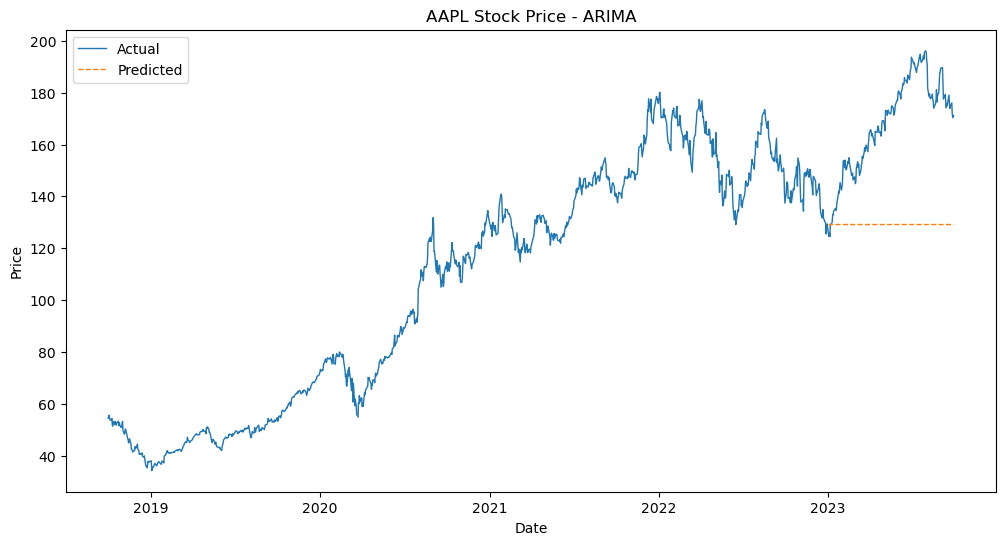

/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be g

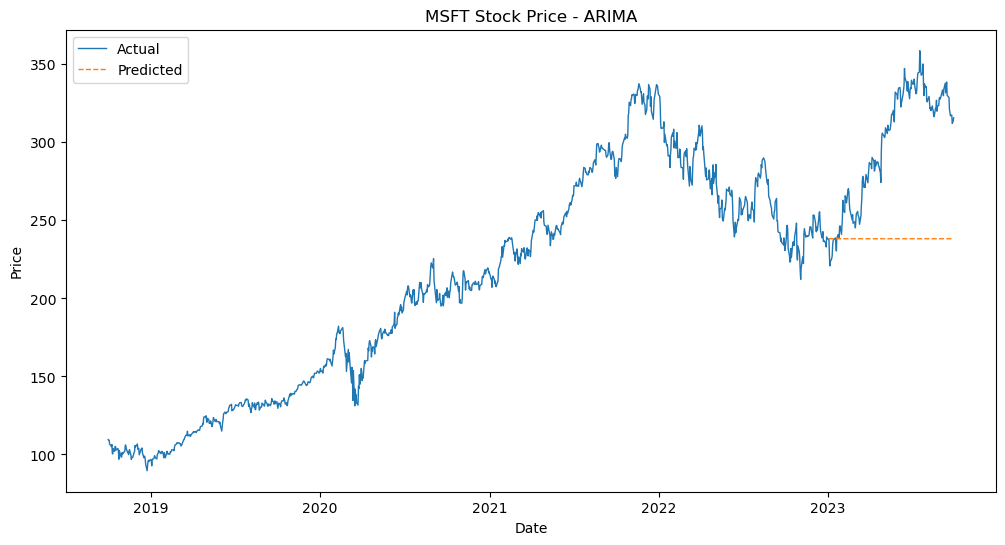

                    MSE       RMSE  R-squared
AAPL_ARIMA  1834.492203  42.830972  -4.886784
MSFT_ARIMA  5000.005745  70.710719  -2.788590


In [8]:
# Create an empty dictionary to store results and plots
results_arima = {}
plots_arima = {}

# Loop through stock symbols
for symbol in stock_symbols:
    data = stock_data[symbol]

    # Split the data into training and testing sets
    split_date = '2023-01-01'
    train_data = data['Adj Close'][data.index < split_date]
    test_data = data['Adj Close'][data.index >= split_date]

    # ARIMA
    model = sm.tsa.ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data, predictions)

    results_arima[f'{symbol}_ARIMA'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

    # Create a plot for ARIMA
    plt.figure(figsize=(12, 6))
    plt.title(f'{symbol} Stock Price - ARIMA')
    plt.plot(data.index, data['Adj Close'], label='Actual', linewidth=1)
    plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Convert the results_arima dictionary into a DataFrame
results_arima_df = pd.DataFrame(results_arima).T
print(results_arima_df)


##SARIMA

/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


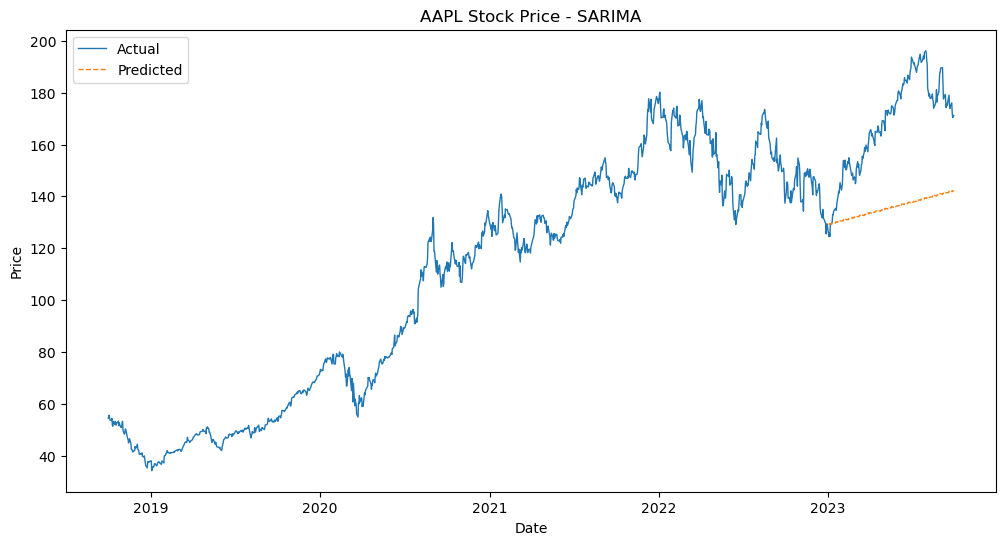

/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohsinchougale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


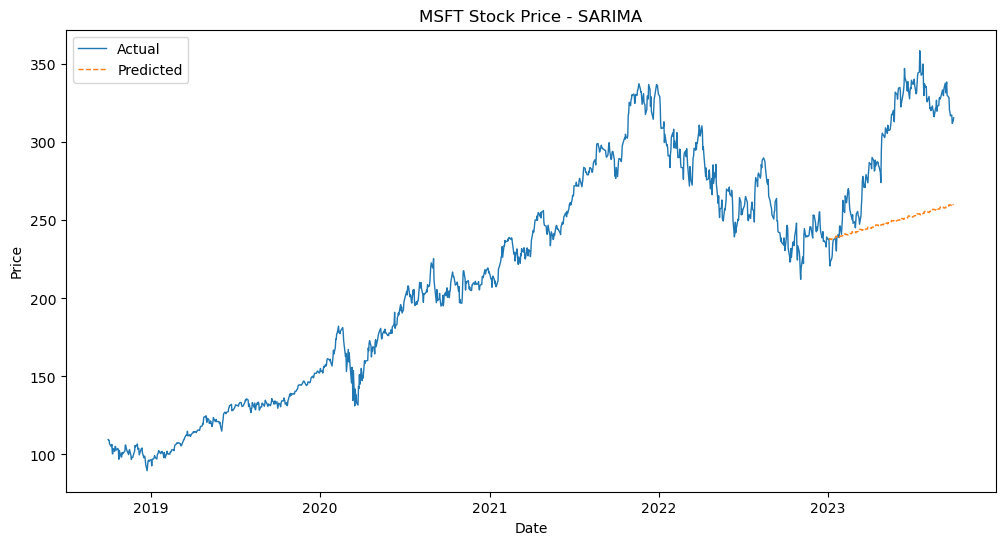

                     MSE       RMSE  R-squared
AAPL_SARIMA  1264.426113  35.558770  -3.057473
MSFT_SARIMA  3428.743237  58.555471  -1.598018


In [9]:
# Create an empty dictionary to store results and plots
results_sarima = {}
plots_sarima = {}

# Loop through stock symbols
for symbol in stock_symbols:
    data = stock_data[symbol]

    # Split the data into training and testing sets
    split_date = '2023-01-01'
    train_data = data['Adj Close'][data.index < split_date]
    test_data = data['Adj Close'][data.index >= split_date]

    # SARIMA
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 12)
    model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=0)
    predictions = model_fit.get_forecast(steps=len(test_data)).predicted_mean

    mse = mean_squared_error(test_data, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data, predictions)

    results_sarima[f'{symbol}_SARIMA'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

    # Create a plot for SARIMA
    plt.figure(figsize=(12, 6))
    plt.title(f'{symbol} Stock Price - SARIMA')
    plt.plot(data.index, data['Adj Close'], label='Actual', linewidth=1)
    plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Convert the results_sarima dictionary into a DataFrame
results_sarima_df = pd.DataFrame(results_sarima).T
print(results_sarima_df)


##LSTM

4/4 [==============================] - 0s 3ms/step


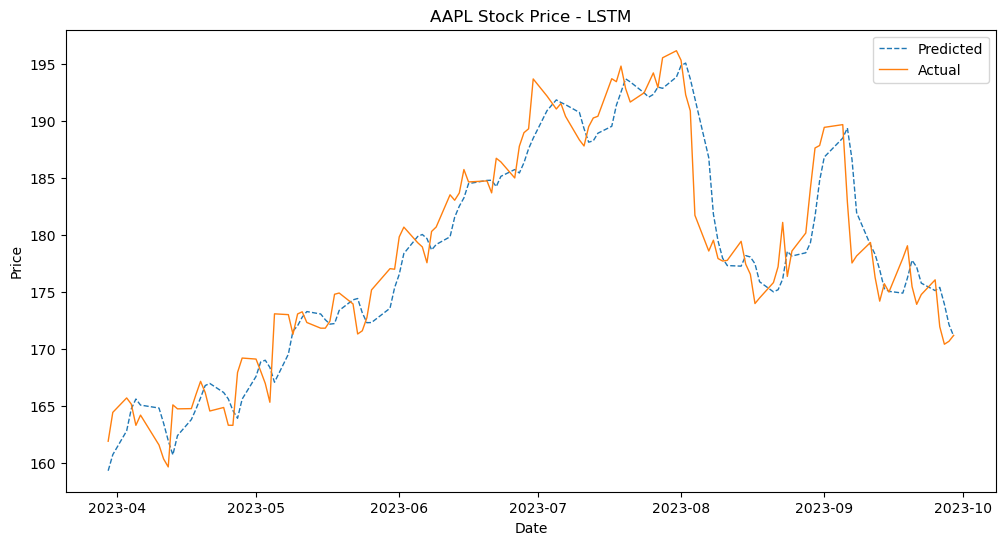

4/4 [==============================] - 0s 3ms/step


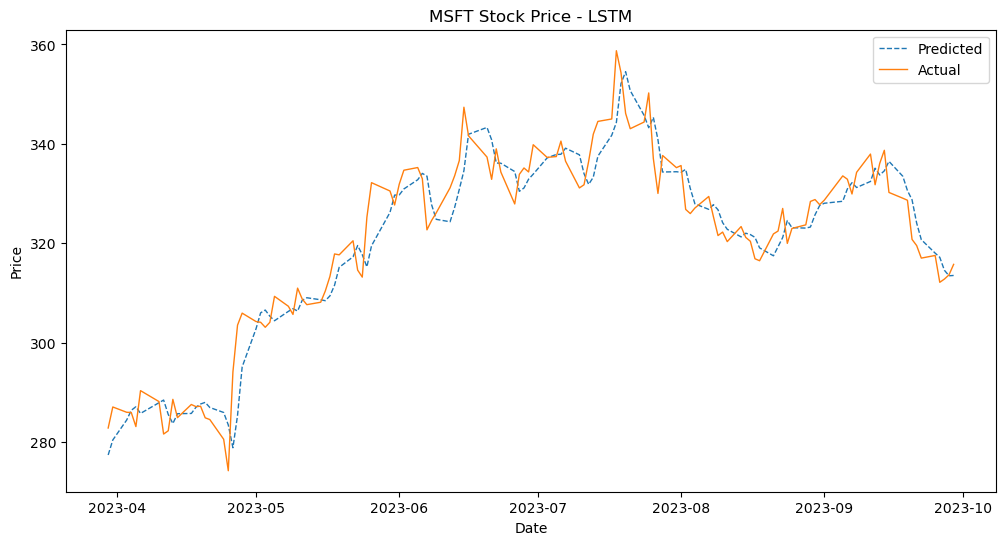

                     MSE        RMSE     R-squared
AAPL_LSTM   31494.292058  177.466312 -7.380385e+06
MSFT_LSTM  102285.516928  319.821070 -1.823470e+07


In [10]:
# Create an empty dictionary to store results and plots
results_lstm = {}
plots_lstm = {}

# Loop through stock symbols
for symbol in stock_symbols:
    data = stock_data[symbol]

    # Split the data into training and testing sets
    split_date = '2023-01-01'
    train_data = data['Adj Close'][data.index < split_date]
    test_data = data['Adj Close'][data.index >= split_date]

    # Define hyperparameters
    look_back = 60  # Number of previous time steps to use as input features
    num_epochs = 100
    batch_size = 32

    # Create a MinMaxScaler to scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data = train_data.values.reshape(-1, 1)
    train_data_scaled = scaler.fit_transform(train_data)

    # Create sequences and labels for training
    X_train, y_train = [], []
    for i in range(look_back, len(train_data_scaled)):
        X_train.append(train_data_scaled[i - look_back:i, 0])
        y_train.append(train_data_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    test_data = test_data.values.reshape(-1, 1)
    test_data_scaled = scaler.transform(test_data)
    X_test, y_test = [], []
    for i in range(look_back, len(test_data_scaled)):
        X_test.append(test_data_scaled[i - look_back:i, 0])
        y_test.append(test_data_scaled[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)

    results_lstm[f'{symbol}_LSTM'] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

    # Create a plot for LSTM
    plt.figure(figsize=(12, 6))
    plt.title(f'{symbol} Stock Price - LSTM')
    plt.plot(data.index[data.index >= split_date][look_back:], predictions, label='Predicted', linestyle='--', linewidth=1)
    plt.plot(data.index[data.index >= split_date][look_back:], test_data[look_back:], label='Actual', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Convert the results_lstm dictionary into a DataFrame
results_lstm_df = pd.DataFrame(results_lstm).T
print(results_lstm_df)


In [11]:
results = {
    **results_exponential_smoothing,
    **results_arima,
    **results_sarima,
    **results_lstm
}
# Convert the all_results dictionary into a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


           AAPL_Exponential_Smoothing  MSFT_Exponential_Smoothing  \
MSE                       1831.040344                 5071.624105   
RMSE                        42.790657                   71.215336   
R-squared                   -4.875707                   -2.842857   

            AAPL_ARIMA   MSFT_ARIMA  AAPL_SARIMA  MSFT_SARIMA     AAPL_LSTM  \
MSE        1834.492203  5000.005745  1264.426113  3428.743237  3.149429e+04   
RMSE         42.830972    70.710719    35.558770    58.555471  1.774663e+02   
R-squared    -4.886784    -2.788590    -3.057473    -1.598018 -7.380385e+06   

              MSFT_LSTM  
MSE        1.022855e+05  
RMSE       3.198211e+02  
R-squared -1.823470e+07  


In [12]:
results_df

,AAPL_Exponential_Smoothing,MSFT_Exponential_Smoothing,AAPL_ARIMA,MSFT_ARIMA,AAPL_SARIMA,MSFT_SARIMA,AAPL_LSTM,MSFT_LSTM
MSE,1831.040344,5071.624105,1834.492203,5000.005745,1264.426113,3428.743237,3.149429e+04,1.022855e+05
RMSE,42.790657,71.215336,42.830972,70.710719,35.558770,58.555471,1.774663e+02,3.198211e+02
R-squared,-4.875707,-2.842857,-4.886784,-2.788590,-3.057473,-1.598018,-7.380385e+06,-1.823470e+07


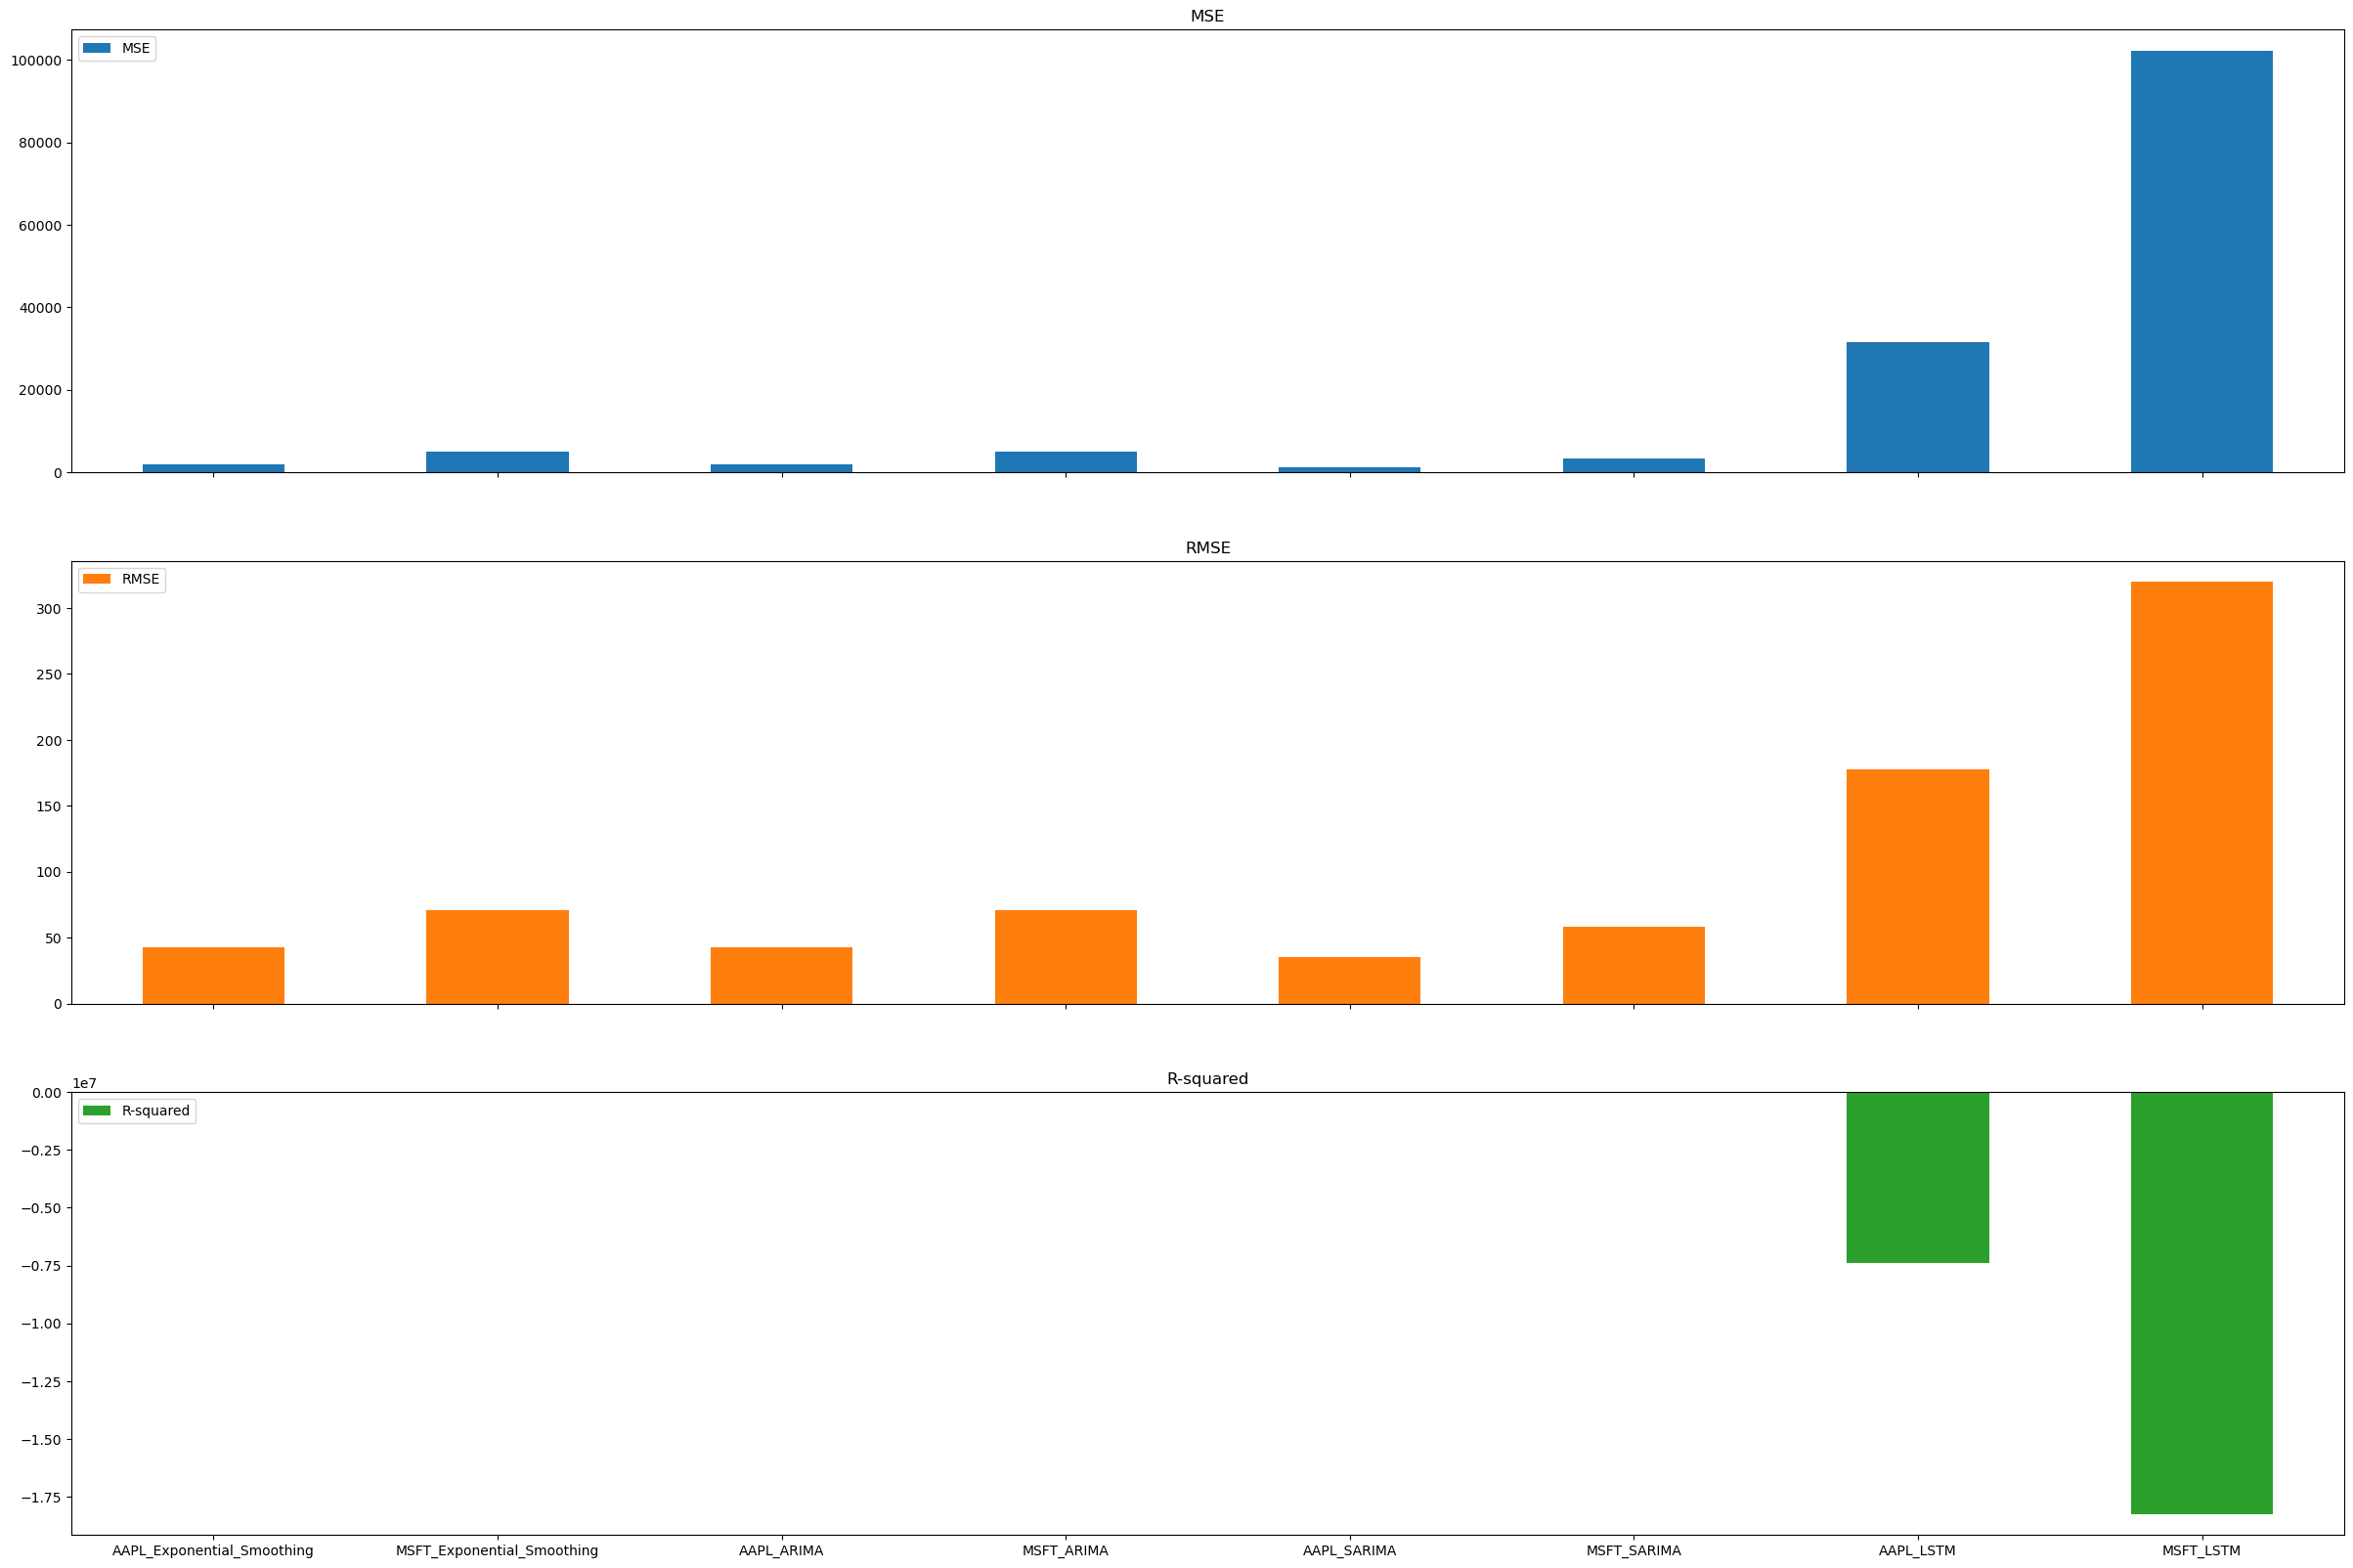

In [16]:
axes = results_df.T.plot(kind='bar', rot=0, subplots=True, figsize=(30, 20))